In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
df1 = pd.read_csv(r'C:\Datasets\cardio_base.csv')

df2 = pd.read_csv(r'C:\Datasets\cardio_alco.csv')

df2[['id', 'alco']] = df2['id;alco'].str.split(';', 1, expand=True)

In [3]:
df1.isnull().sum()
df2.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [7]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id;alco  56903 non-null  object
 1   id       56903 non-null  object
 2   alco     56903 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [5]:
#Converts ID field to int
df2['id'] = df2['id'].astype(np.int64)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id;alco  56903 non-null  object
 1   id       56903 non-null  int64 
 2   alco     56903 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
#Merges df1 and df2 into a big_df
df2 = df2.drop('id;alco', 1)
big_df = pd.merge(df1, df2, on="id", how="left")

In [20]:
#there are missing values in the beginning and by the end of df.
big_df.head()
big_df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,18393,2,168,62.0,110,80,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,0,NaN
2,2,18857,1,165,64.0,130,70,3,0,NaN
3,3,17623,2,169,82.0,150,100,1,0,NaN
4,4,17474,1,156,56.0,100,60,1,0,NaN


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [34]:
big_df.isnull().sum()

id                 0
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol        0
smoke              0
alco           13097
dtype: int64

In [31]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [41]:
#splits a dataframe by loc, selecting alco == NaN
#big_df.loc[(big_df['alco'].isnull())]

In [49]:
#Drop NaN
big_df.dropna(inplace=True)

#pd.options.display.max_rows = 999

In [50]:
big_df.info()
big_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56903 entries, 32 to 69966
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  object 
 2   gender       56903 non-null  object 
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   alco         56903 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 4.8+ MB


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
alco           0
dtype: int64

In [9]:
big_df['age'] = big_df['age'].apply(lambda x: round(x / 365), 0)

big_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50,2,168,62.0,110,80,1,0,NaN
1,1,55,1,156,85.0,140,90,3,0,NaN
2,2,52,1,165,64.0,130,70,3,0,NaN
3,3,48,2,169,82.0,150,100,1,0,NaN
4,4,48,1,156,56.0,100,60,1,0,NaN


In [10]:
#str(big_df.loc[[0],["age"]])
str(big_df.at[0,'age'])

'50'

In [11]:
#Considering 2 as male and 1 as female
big_df['gender'] = big_df['gender'].replace([2, 1],['male','female'])
big_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50,male,168,62.0,110,80,1,0,NaN
1,1,55,female,156,85.0,140,90,3,0,NaN
2,2,52,female,165,64.0,130,70,3,0,NaN
3,3,48,male,169,82.0,150,100,1,0,NaN
4,4,48,female,156,56.0,100,60,1,0,NaN


In [14]:
#Verify the distribution in the 1st, 2nd, 3rd and 4th quartiles 
big_df['weight'].quantile(0.75)

82.0

In [15]:
big_df['weight'].quantile(0.25)

65.0

In [18]:
big_df['weight'].quantile(0.90)

93.0

In [19]:
big_df['weight'].quantile(0.10)

58.0

In [ ]:
big_df.groupby(['population'], sort=False)['location']

In [94]:
elder_df = big_df.loc[(big_df['age'] >= 50)]


In [24]:
test_df['cholesterol'].mean()

1.4156016467971357

In [25]:
low_col_df = big_df.loc[(big_df['age'] < 50)]

In [26]:
low_col_df['cholesterol'].mean()

1.2336657955090937

In [30]:
big_df.groupby(['gender']).mean()

,id,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,
female,49898.345267,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
male,50110.246547,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880


In [31]:
big_df['height'].quantile(0.99)

184.0

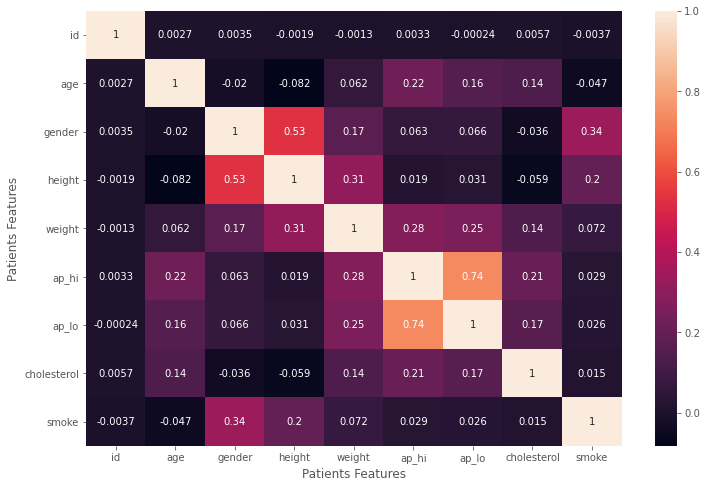

In [7]:
#Plot correlation matrix into heatmap by Spearman method
correlation_matrix = big_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Patients Features')
plt.ylabel('Patients Features')
plt.show()

In [35]:
#Mean height from big_df
big_df['height'].mean()

164.35922857142856

In [36]:
#Height Standard Deviation from big_df
big_df['height'].std()

8.210126364538139

In [52]:
#Df with patients onder than 50
elder_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
33,45,57,female,160,73.0,130,85,1,0,0
34,46,60,male,173,82.0,140,90,3,0,0
35,47,56,female,163,55.0,120,80,1,0,0
36,49,50,male,175,95.0,120,80,1,0,0
38,52,64,male,162,72.0,130,80,1,1,0
...,...,...,...,...,...,...,...,...,...,...
69960,99947,56,male,169,79.0,140,90,1,0,0
69962,99949,58,female,178,69.0,130,90,1,0,0
69963,99950,54,male,155,76.0,130,90,1,0,0
69964,99951,62,male,170,72.0,120,80,1,0,0


In [61]:
#checks cholesterol and smoke coorelation for this group
elder_df.groupby(['gender']).sum()

,id,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,
female,1338965476,4444139,2015005.73,3583980,2697212,39623,453
male,685283794,2394460,1092213.50,1845668,1434304,19471,2915


In [96]:
#Converts remaining fields to a proper datatype, in order to include alcohol
elder_df['alco'].astype('int64')

33       0
34       0
35       0
36       0
38       0
        ..
69960    0
69962    0
69963    0
69964    0
69966    0
Name: alco, Length: 41695, dtype: int64

In [97]:
elder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41695 entries, 33 to 69966
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           41695 non-null  int64  
 1   age          41695 non-null  object 
 2   gender       41695 non-null  object 
 3   height       41695 non-null  int64  
 4   weight       41695 non-null  float64
 5   ap_hi        41695 non-null  int64  
 6   ap_lo        41695 non-null  int64  
 7   cholesterol  41695 non-null  int64  
 8   smoke        41695 non-null  int64  
 9   alco         41695 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.5+ MB


In [67]:
#Groupby includes alcohool on the aggregation function
elder_df.groupby(['gender']).sum()

,id,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
gender,,,,,,,,
female,1338965476,4444139,2015005.73,3583980,2697212,39623,453,674
male,685283794,2394460,1092213.50,1845668,1434304,19471,2915,1412


In [73]:
#Creates a df with people younger than 50
low_df = big_df.loc[(big_df['age'] < 50)]

In [77]:
low_df['alco'].astype('int64')


32       0
37       0
45       0
48       0
49       0
        ..
69954    0
69957    0
69958    0
69961    0
69965    0
Name: alco, Length: 15208, dtype: int64

In [78]:
#checks lo_df info
low_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15208 entries, 32 to 69965
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15208 non-null  int64  
 1   age          15208 non-null  object 
 2   gender       15208 non-null  object 
 3   height       15208 non-null  int64  
 4   weight       15208 non-null  float64
 5   ap_hi        15208 non-null  int64  
 6   ap_lo        15208 non-null  int64  
 7   cholesterol  15208 non-null  int64  
 8   smoke        15208 non-null  int64  
 9   alco         15208 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


In [81]:
#Cholesterol, smoke and alcohol coorelation for group younger than 50 
low_df.groupby(['gender']).count()


,id,age,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
gender,,,,,,,,,
female,9368,9368,9368,9368,9368,9368,9368,9368,9368
male,5840,5840,5840,5840,5840,5840,5840,5840,5840


In [118]:
#big_df mean by smokers and non smokers
big_df.groupby(['smoke']).mean()

,id,height,weight,ap_hi,ap_lo,cholesterol
smoke,,,,,,
0,48525.756382,163.869987,73.853289,129.072767,96.631151,1.365668
1,47920.541576,169.358603,77.356142,128.278230,97.999802,1.390554


In [105]:
#big_df mean by gender
big_df.groupby(['gender']).mean()

,id,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,
female,48433.533952,161.349942,72.518000,128.235406,95.263877,1.386722,0.018268
male,48543.690087,169.922422,77.210434,130.422672,99.508570,1.332966,0.218703


In [ ]:
big_df()